In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fetch3.helpers import load_model_outputs

from pathlib import Path
%matplotlib widget

In [2]:
def get_canopy_H(dsall, dscanopy):
    H = dsall.H
    zind_canopy = np.arange(len(dsall.z) - len(dscanopy.z),len(dsall.z))
    H_can = H.isel(z=zind_canopy)
    return zind_canopy, H_can

In [3]:
# CHANGE TO THE CORRECT FILE PATH FOR YOUR OUTPUT
# Directory where the model outputs were written
model_output_dirc0 = "C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\output\\osmo_testrunM8_c0\\UMBS_test_Ameriflux_M8_20220513T114456\\000000"
model_output_dirc200 = "C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\output\\osmo_testrun_M8_c200\\UMBS_test_Ameriflux_M8_20220513T112152\\000000"
model_output_dirc500 ="C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\output\\osmo_testrunM8_c500\\UMBS_test_Ameriflux_M8_20220513T113143\\000000"
model_output_dir28ppt="C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\output\\osmo_mangrove_test_28ppt\\PortF_test_mangroveAG_20220617T163458\\000000"

In [4]:
# CHANGE TO THE CORRECT FILE PATH FOR YOUR COMPUTER
# loading the input met data

filein = "C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\data\\port_F_2010_Mangrove.csv"
met = pd.read_csv(filein, parse_dates=['Timestamp'])
met = met.set_index('Timestamp')

In [5]:
dsall0, canopy0, soil0, roots0, sapflux0, nhl0 = load_model_outputs(model_output_dirc0)
dsall200, canopy200, soil200, roots200, sapflux200, nhl200 = load_model_outputs(model_output_dirc200)
dsall500, canopy500, soil500, roots500, sapflux500, nhl500 = load_model_outputs(model_output_dirc500)
dsall, canopy, soil, roots, sapflux, nhl = load_model_outputs(model_output_dir28ppt)



In [6]:
#NHL transpiration (transpiration before reduction from xylem water potential was applied)
filein0 = Path(model_output_dirc0) /'nhl_out.nc'
nhl20 = xr.load_dataset(filein)
nhl_tot0 = (nhl20.NHL_trans_sp_stem * dz).sum(dim='z')

filein200 = Path(model_output_dirc200) / 'nhl_out.nc'
nhl2200 = xr.load_dataset(filein)
nhl_tot200= (nhl2200.NHL_trans_sp_stem * dz).sum(dim='z')

filein500 = Path(model_output_dirc500) / 'nhl_out.nc'
nhl2500 = xr.load_dataset(filein)
nhl_tot500= (nhl2500.NHL_trans_sp_stem * dz).sum(dim='z')

filein500 = Path(model_output_dirc500) / 'nhl_out.nc'
nhl2500 = xr.load_dataset(filein)
nhl_tot500= (nhl2500.NHL_trans_sp_stem * dz).sum(dim='z')

ValueError: did not find a match in any of xarray's currently installed IO backends ['scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [8]:
filein = Path(model_output_dir28ppt) / 'nhl_out.nc'
nhl = xr.load_dataset(filein)
nhl_tot= (nhl.NHL_trans_sp_stem * dz).sum(dim='z')

In [16]:
# Calculate vertically integrated transpiration
dz = canopy.z[1] - canopy.z[0]
trans_tot = (canopy.trans_2d * dz).sum(dim='z')
np.shape(trans_tot)
np.shape(nhl_tot)

(97,)

In [11]:
# Calculate vertically integrated transpiration
dz = canopy0.z[1] - canopy0.z[0]
trans_tot0 = (canopy0.trans_2d * dz).sum(dim='z')

dz = canopy200.z[1] - canopy200.z[0]
trans_tot200 = (canopy200.trans_2d * dz).sum(dim='z')

dz = canopy500.z[1] - canopy500.z[0]
trans_tot500 = (canopy500.trans_2d * dz).sum(dim='z')

NameError: name 'trans_tot0' is not defined

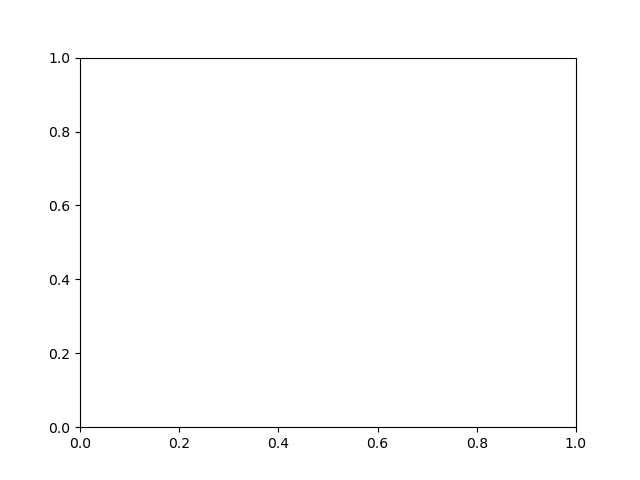

In [9]:
#Plot NHL transpiration and model transpiration

fig, axs = plt.subplots()

ax = axs

trans_tot0.plot.line(x='time')
trans_tot200.plot.line(x='time')
trans_tot500.plot.line(x='time')
#(nhl_tot0*(10**-3)).plot.line(x='time')
#(nhl_tot200*(10**-3)).plot.line(x='time')
#(nhl_tot500*(10**-3)).plot.line(x='time')
ax.legend(["trans_tot0","trans_tot200","trans_tot500"]) #"nhl_tot0","nhl_tot200","nhl_tot500"])

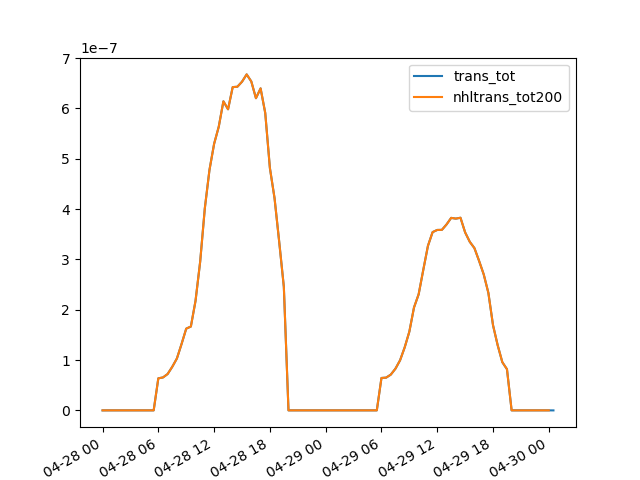

In [18]:
#Plot NHL transpiration and model transpiration

fig, axs = plt.subplots()

ax = axs

trans_tot.plot.line(x='time')

(nhl_tot*(10**-3)).plot.line(x='time')
ax.legend(["trans_tot","nhltrans_tot200"])

In [21]:
trans_tot
nhl_tot*(10**-3)

<xarray.DataArray (time: 97)>
array([8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       6.37315063e-08, 6.54668304e-08, 7.22701513e-08, 8.66404735e-08,
       1.03242384e-07, 1.31967428e-07, 1.62403285e-07, 1.66621925e-07,
       2.17474709e-07, 2.95384438e-07, 4.01320027e-07, 4.77563465e-07,
       5.29541525e-07, 5.63581901e-07, 6.13990865e-07, 5.98153919e-07,
       6.42235847e-07, 6.42918924e-07, 6.52882677e-07, 6.67458594e-07,
       6.53430622e-07, 6.20194419e-07, 6.39711685e-07, 5.90717074e-07,
       4.81501173e-07, 4.21621408e-07, 3.35181740e-07, 2.45476386e-07,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       6.44201501e-08, 6.50917456e-08, 7.10221491e-08, 8.27354779e-08,
       9.94845140e-08, 1.25258360e-07, 1.56471963e-07, 2.04433817e-07,
       2.30650402e-07, 2.79276407e-07, 3.26894341e-07, 3.54156089e-07,
       3.58443229e-07, 3.58608137e-07, 3.69385591e-07, 3.82440087e-07,
       3.80955044e-07, 3.82716119e-07, 3.53614558e-07, 3.34879458e-07,
       3.22381018e-07, 2.97057208e-07, 2.70157338e-07, 2.33392686e-07,
       1.69174619e-07, 1.29510116e-07, 9.57891531e-08, 8.18201369e-08,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11])
Coordinates:
  * time     (time) datetime64[ns] 2010-04-28 2010-04-28T00:30:00 ... 2010-04-30

In [22]:
trans_tot

<xarray.DataArray (time: 98)>
array([0.00000000e+00, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       8.45737483e-11, 8.45737483e-11, 8.45737483e-11, 8.45737483e-11,
       6.37315063e-08, 6.54668304e-08, 7.22701513e-08, 8.66404735e-08,
       1.03242384e-07, 1.31967428e-07, 1.62403285e-07, 1.66621925e-07,
       2.17474709e-07, 2.95384438e-07, 4.01320027e-07, 4.77563465e-07,
       5.29541525e-07, 5.63581901e-07, 6.13990865e-07, 5.98153919e-07,
       6.42235846e-07, 6.42918923e-07, 6.52882674e-07, 6.67458585e-07,
       6.53430603e-07, 6.20194384e-07, 6.39711610e-07, 5.90716954e-07,
       4.81501038e-07, 4.21621254e-07, 3.35181602e-07, 2.45476286e-07,
       8.45737265e-11, 8.45737321e-11, 8.45737362e-11, 8.45737394e-11,
       8.45737417e-11, 8.45737435e-11, 8.45737448e-11, 8.45737458e-11,
       8.45737465e-11, 8.45737470e-11, 8.45737474e-11, 8.45737477e-11,
       8.45737479e-11, 8.45737480e-11, 8.45737481e-11, 8.45737482e-11,
       8.45737482e-11, 8.45737482e-11, 8.45737483e-11, 8.45737483e-11,
       6.44201501e-08, 6.50917456e-08, 7.10221491e-08, 8.27354779e-08,
       9.94845140e-08, 1.25258360e-07, 1.56471963e-07, 2.04433817e-07,
       2.30650402e-07, 2.79276407e-07, 3.26894341e-07, 3.54156089e-07,
       3.58443228e-07, 3.58608136e-07, 3.69385590e-07, 3.82440086e-07,
       3.80955042e-07, 3.82716117e-07, 3.53614554e-07, 3.34879453e-07,
       3.22381012e-07, 2.97057202e-07, 2.70157332e-07, 2.33392680e-07,
       1.69174615e-07, 1.29510113e-07, 9.57891515e-08, 8.18201357e-08,
       8.45737475e-11, 8.45737477e-11, 8.45737479e-11, 8.45737480e-11,
       8.45737481e-11, 8.45737482e-11, 8.45737482e-11, 8.45737482e-11,
       8.45737483e-11, 0.00000000e+00])
Coordinates:
  * time     (time) datetime64[ns] 2010-04-28 ... 2010-04-30T00:30:00

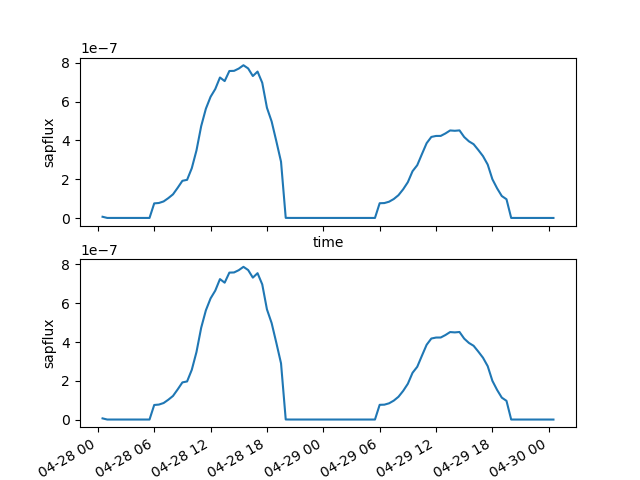

In [23]:
# Plot sapflux and change in storage
fig, axs = plt.subplots(2,1, sharex = True)

ax = axs[0]
#sapflux0.sapflux.plot.line(x='time', ax=ax)
#sapflux200.sapflux.plot.line(x='time', ax=ax)
#sapflux500.sapflux.plot.line(x='time', ax=ax)
sapflux.sapflux.plot.line(x='time',ax=ax)

ax = axs[1]
#sapflux0.storage.plot.line(x='time', ax=ax)
#sapflux200.storage.plot.line(x='time', ax=ax)
#sapflux500.storage.plot.line(x='time', ax=ax)
sapflux.sapflux.plot.line(x='time',ax=ax)
#ax.legend(["sapflux0","sapflux200" ,"sapflux5000"])#delta S", "storage"])

In [33]:
df=pd.read_csv("C:\\Users\\maria\\Box\\GradSchool\\GitHub\\fetch3_nhl_1\\fetch3_nhl\\data\\port_F_2010_Mangrove_sap.csv")

df.head()

,Timestamp,TA_F,SW_IN_F,RH,NETRAD,PA_F,WS_F,USTAR,PPFD_IN,P_F,CO2_F,VPD_kPa,SWC_m3m3,SapFlux
0,4/28/2010 0:00,18.25,23.539,62.92,-7.49,100,7.3,0.1990,0.0,0,403.40,0.8026,0.5,0.0
1,4/28/2010 0:30,18.05,32.950,64.94,-10.12,100,7.3,0.2201,0.0,0,406.76,0.7529,0.5,0.0
2,4/28/2010 1:00,17.92,55.034,62.07,-8.75,100,7.0,0.2583,0.0,0,412.91,0.8140,0.5,0.0
3,4/28/2010 1:30,17.87,69.563,61.99,-15.77,100,7.0,0.2641,0.0,0,419.72,0.8180,0.5,0.0
4,4/28/2010 2:00,17.97,62.186,59.60,-10.10,100,6.6,0.2721,0.0,0,430.40,0.8927,0.5,0.0


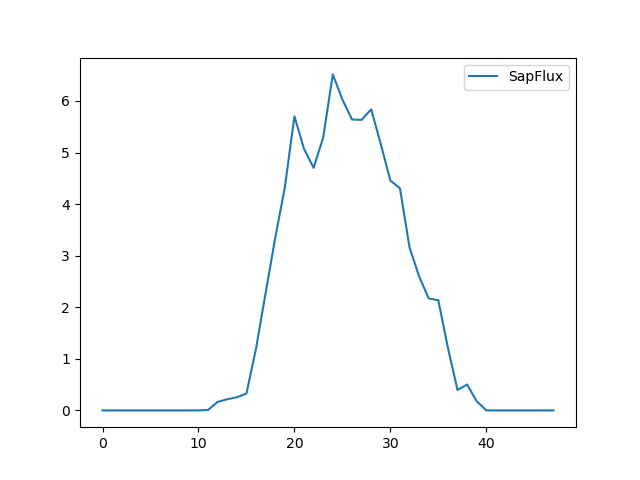

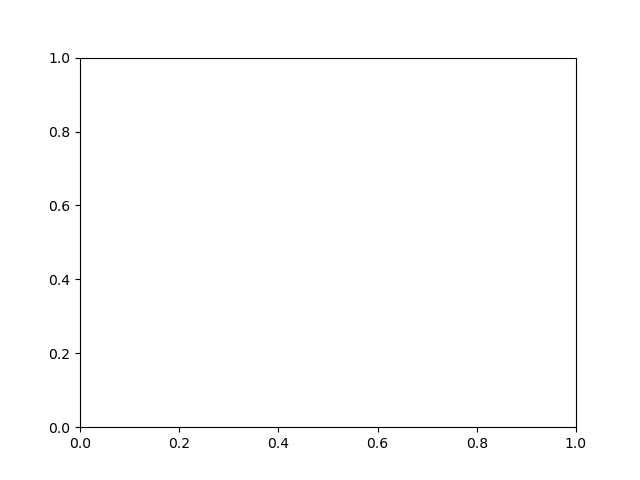

In [39]:
#plt.plot(df['DOY (DOY)'][0:97],df['SapFlux_mangrove_5mm (kg/m2-sapwood/s)'])
df.iloc[0:48].plot(y='SapFlux')
#plt.plot(df['Timestamp'],df['SapFlux'])
fig, axs = plt.subplots()

#ax = axs

#df['SapFlux'].plot.line(x=df['Timestamp'])